# Post-processing of results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Helper utilities

In [2]:
XLIM = (500, 3600)
YLIM = (-0.02, 1.02)


def load_data(fname, rename=None):
    """ Load OpenCalphad results in a standard fashion. """
    df = pd.read_csv(fname, sep=",", header=0)
    df = df.fillna(0.0).sort_values("T")
    df = df.groupby("T").mean().reset_index()

    if rename is not None:
        df.rename(columns=rename, inplace=True)
        
    return df


def plot_data(df, title, loc=1, xlim=XLIM, ylim=YLIM):
    """ Plot OpenCalphad results in a standard fashion. """
    T = df["T"].to_numpy()
    phases = df.columns[1:]

    plt.close("all")
    plt.style.use("seaborn-white")
    fig, ax = plt.subplots(figsize=(8, 6))

    for phase in phases:
        Y = df[phase].to_numpy()
        ax.plot(T, Y, label=phase)

    ax.grid(linestyle=":")

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    ax.set_title(title)
    ax.set_xlabel("Temperature [K]")
    ax.set_ylabel("Phase molar fraction")

    handles, labels = ax.get_legend_handles_labels()
    lgd = ax.legend(handles, labels, loc="lower left",
                    bbox_to_anchor=(1.0, 0.0), fancybox=True,
                    shadow=True)

    fig.tight_layout()
    return fig, (lgd,)

## Macro A2 - Pure $\mathrm{SiO_2}$ with Hallstedt (1992)

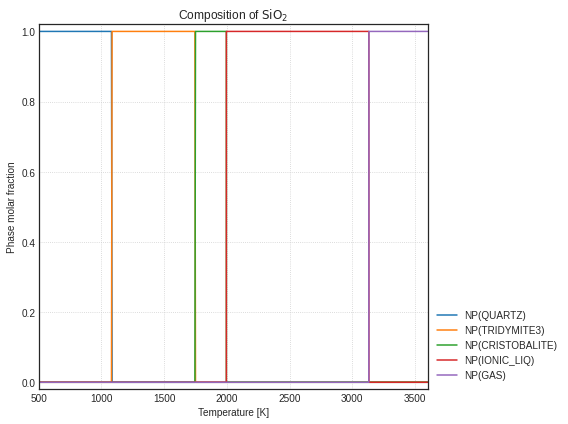

In [3]:
cols = ["T", "NP(QUARTZ)", "NP(TRIDYMITE3)",
        "NP(CRISTOBALITE)", "NP(IONIC_LIQ)", "NP(GAS)"]

df = load_data("post/results-macro-A2.csv")[cols]
fig, artists = plot_data(df, "Composition of $\\mathrm{SiO_2}$")
fig.savefig("post/results-macro-A2.png", dpi=300,
            bbox_extra_artists=artists,
            bbox_inches="tight")

Missing reference for the next transformation.

In [4]:
df.loc[df["NP(TRIDYMITE3)"] > 0.99].iloc[0]

T                   1.085000e+03
NP(QUARTZ)          0.000000e+00
NP(TRIDYMITE3)      1.000000e+00
NP(CRISTOBALITE)    0.000000e+00
NP(IONIC_LIQ)       0.000000e+00
NP(GAS)             1.000280e-12
Name: 122, dtype: float64

According to Hallstedt (1992) this melting should happen at 1744 K on the oxygen lean side. No report is available for the O-rich side of the diagram (used to approximate $\mathrm{SiO_2}$ here).

In [5]:
df.loc[df["NP(CRISTOBALITE)"] > 0.99].iloc[0]

T                   1.750000e+03
NP(QUARTZ)          0.000000e+00
NP(TRIDYMITE3)      0.000000e+00
NP(CRISTOBALITE)    1.000000e+00
NP(IONIC_LIQ)       0.000000e+00
NP(GAS)             1.000185e-12
Name: 263, dtype: float64

According to Hallstedt (1992) this melting should happen at 1996 K on the O-rich side of the diagram (used to approximate $\mathrm{SiO_2}$ here).

In [6]:
df.loc[df["NP(IONIC_LIQ)"] > 0.99].iloc[0]

T                   1.996040e+03
NP(QUARTZ)          0.000000e+00
NP(TRIDYMITE3)      0.000000e+00
NP(CRISTOBALITE)    0.000000e+00
NP(IONIC_LIQ)       1.000000e+00
NP(GAS)             6.550310e-13
Name: 317, dtype: float64

According to Hallstedt (1992) this melting should happen at 3134 K at nominal $\mathrm{SiO_2}$.

In [7]:
df.loc[df["NP(GAS)"] > 0.99].iloc[0]

T                   3131.51
NP(QUARTZ)             0.00
NP(TRIDYMITE3)         0.00
NP(CRISTOBALITE)       0.00
NP(IONIC_LIQ)          0.00
NP(GAS)                1.00
Name: 590, dtype: float64